In [1]:
import os
import sys
import pandas as pd
import numpy as np
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
!echo $PUIDATA
puidata = os.getenv('PUIDATA')

/nfshome/lj1232/PUIdata


In [3]:
url = 'https://serv.cusp.nyu.edu/~fbianco/PUIdata/'
for f in ['311_Service_Requests_from_2010_to_Present_head.csv',
          '311_Service_Requests_from_2010_to_Present_short.csv',
          'NYPD_7_Major_Felony_Incidents.csv']:
    os.system('curl -O ' + url + f)
    os.system('mv ' + f + ' ' + puidata)

In [4]:
!ls $PUIDATA

201705-citibike-tripdata.csv.zip
201803_citibike_tripdata.csv.zip
311_Service_Requests_from_2010_to_Present_head.csv
311_Service_Requests_from_2010_to_Present_short.csv
dhsdaily.csv
DOB_Complaints_311.csv
JC-201705-citibike-tripdata.csv
JC-201803-citibike-tripdata.csv
NYPD_7_Major_Felony_Incidents.csv
times.txt


In [5]:
import glob
glob.glob(puidata + '/*')

['/nfshome/lj1232/PUIdata/201705-citibike-tripdata.csv.zip',
 '/nfshome/lj1232/PUIdata/times.txt',
 '/nfshome/lj1232/PUIdata/JC-201803-citibike-tripdata.csv',
 '/nfshome/lj1232/PUIdata/DOB_Complaints_311.csv',
 '/nfshome/lj1232/PUIdata/201803_citibike_tripdata.csv.zip',
 '/nfshome/lj1232/PUIdata/JC-201705-citibike-tripdata.csv',
 '/nfshome/lj1232/PUIdata/dhsdaily.csv',
 '/nfshome/lj1232/PUIdata/NYPD_7_Major_Felony_Incidents.csv',
 '/nfshome/lj1232/PUIdata/311_Service_Requests_from_2010_to_Present_head.csv',
 '/nfshome/lj1232/PUIdata/311_Service_Requests_from_2010_to_Present_short.csv']

In [6]:
fin = open(puidata + '/311_Service_Requests_from_2010_to_Present_short.csv', 'r')

In [7]:
x = fin.readlines()

In [8]:
type (x)

list

In [9]:
len(x)

100

In [10]:
len(x[0])

110

In [11]:
type(x[0])

str

In [12]:
x[0]

'Unique Key,Created Date,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude\n'

In [13]:
fin.close()

In [14]:
fin = open(puidata + '//311_Service_Requests_from_2010_to_Present_short.csv', 'r')

In [15]:
fin.readline()

'Unique Key,Created Date,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude\n'

In [16]:
fin.readline()

'34212771,09/01/2016 12:00:06 AM,11413,1052223,185368,40.67520813178531,-73.75494944502233\n'

In [17]:
fin.close()

In [18]:
fin = open(puidata + '//311_Service_Requests_from_2010_to_Present_short.csv', 'r')
fin.read(8)

'Unique K'

In [19]:
fin.close()

In [20]:
with open(puidata + 
          '//311_Service_Requests_from_2010_to_Present_short.csv', 'r') as fin:
    toodata = fin.read()
print(toodata)

Unique Key,Created Date,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
34212771,09/01/2016 12:00:06 AM,11413,1052223,185368,40.67520813178531,-73.75494944502233
34212392,09/01/2016 12:00:35 AM,10469,1023875,259913,40.87998640855491,-73.85670741555177
34214520,09/01/2016 12:00:37 AM,11369,1019812,217879,40.76463242381882,-73.87162284918391
34212483,09/01/2016 12:00:54 AM,10466,1025510,261946,40.885558858976104,-73.85078238918491
34214231,09/01/2016 12:01:15 AM,10040,1003750,254115,40.864140093130686,-73.92950060219349
34223410,09/01/2016 12:02:00 AM,10031,996684,238064,40.820097574803015,-73.95507644617044
34219357,09/01/2016 12:02:00 AM,11365,1041679,208204,40.73796206550144,-73.79276687084037
34211394,09/01/2016 12:02:03 AM,11103,1007798,217595,40.76389308093824,-73.91499378600639
34217294,09/01/2016 12:02:07 AM,10468,1013623,255108,40.86683824468553,-73.89380189150275
34213164,09/01/2016 12:03:16 AM,11222,998402,202531,40.7225662037401,-73.94894

In [21]:
print (x[0].split(','))

['Unique Key', 'Created Date', 'Incident Zip', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Latitude', 'Longitude\n']


alldata = []

for i in x:
    strings = i.split(',')
    alldata.append(strings)
alldata

In [22]:
data = np.genfromtxt(puidata + "/311_Service_Requests_from_2010_to_Present_short.csv", delimiter=',', usecols=(0,2,3,4,5,6))
data.shape

(100, 6)

In [23]:
type(data)

numpy.ndarray

In [24]:
data[0]

array([ nan,  nan,  nan,  nan,  nan,  nan])

In [25]:
data[1]

array([  3.42127710e+07,   1.14130000e+04,   1.05222300e+06,
         1.85368000e+05,   4.06752081e+01,  -7.37549494e+01])

In [26]:
data = np.genfromtxt(puidata + "/311_Service_Requests_from_2010_to_Present_short.csv", delimiter=',', usecols=(0,1,2,3,4,5,6), skip_header=1 )
data[0]

array([  3.42127710e+07,              nan,   1.14130000e+04,
         1.05222300e+06,   1.85368000e+05,   4.06752081e+01,
        -7.37549494e+01])

In [27]:
data.shape

(99, 7)

In [28]:
data = np.genfromtxt(puidata + "/311_Service_Requests_from_2010_to_Present_short.csv", delimiter=',', usecols=(0,2,3,4,5,6), skip_header=1, unpack=True )
data.shape

(6, 99)

In [29]:
print (data[0], data[0].shape)


[ 34212771.  34212392.  34214520.  34212483.  34214231.  34223410.
  34219357.  34211394.  34217294.  34213164.  34212770.  34214130.
  34217841.  34212954.  34216160.  34216500.  34221835.  34211702.
  34219447.  34217113.  34214548.  34221511.  34217276.  34217959.
  34210942.  34213767.  34214112.  34212140.  34216046.  34214014.
  34216956.  34226414.  34224524.  34217709.  34218143.  34222231.
  34217303.  34213421.  34215972.  34222268.  34221144.  34213744.
  34224352.  34223699.  34213166.  34212338.  34210938.  34216167.
  34216756.  34213978.  34216504.  34213839.  34217179.  34216324.
  34211957.  34211967.  34212999.  34214166.  34214406.  34213441.
  34225420.  34215208.  34211102.  34211752.  34224255.  34216968.
  34216052.  34225272.  34222223.  34218580.  34211701.  34218966.
  34223817.  34218182.  34216138.  34218992.  34217470.  34214839.
  34216795.  34211839.  34221378.  34213443.  34211256.  34215673.
  34215616.  34218919.  34225320.  34214171.  34216015.  34217

In [30]:
data = np.genfromtxt(puidata + "/311_Service_Requests_from_2010_to_Present_short.csv", delimiter=',', 
                     dtype={'names':['id', 'date', 'zip', 'x', 'y', 'lat', 'long'], 'formats':['d', 'S22', 'd', 'd', 'd', 'f', 'f']}, skip_header=1)
type(data)

numpy.ndarray

In [31]:
data[0], data[1]

((34212771.0, b'09/01/2016 12:00:06 AM', 11413.0, 1052223.0, 185368.0, 40.675209045410156, -73.75495147705078),
 (34212392.0, b'09/01/2016 12:00:35 AM', 10469.0, 1023875.0, 259913.0, 40.87998580932617, -73.85670471191406))

In [32]:
df = pd.read_csv('https://serv.cusp.nyu.edu/~fbianco/PUIdata/311_Service_Requests_from_2010_to_Present.csv')
df.columns

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [33]:
type(df[['Latitude']])

pandas.core.frame.DataFrame

In [34]:
dfNoise = df[df['Complaint Type'].str.contains('Noise')]

In [35]:
dfNoise.drop(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name', 'Location'], axis=1, inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [36]:
dfNoise.head()

,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
0,1052223.0,185368.0,40.675208,-73.754949
8,1013623.0,255108.0,40.866838,-73.893802
9,998402.0,202531.0,40.722566,-73.948944
10,995738.0,200662.0,40.717440,-73.958558
17,1002780.0,190153.0,40.688583,-73.933184


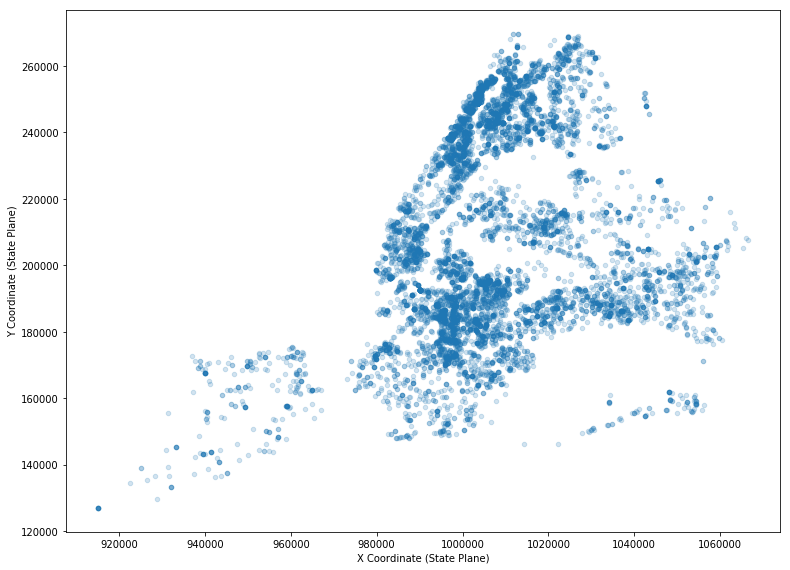

In [37]:
dfNoise.plot.scatter(x='X Coordinate (State Plane)', y='Y Coordinate (State Plane)', alpha=0.2, figsize=(12.8,9.6))

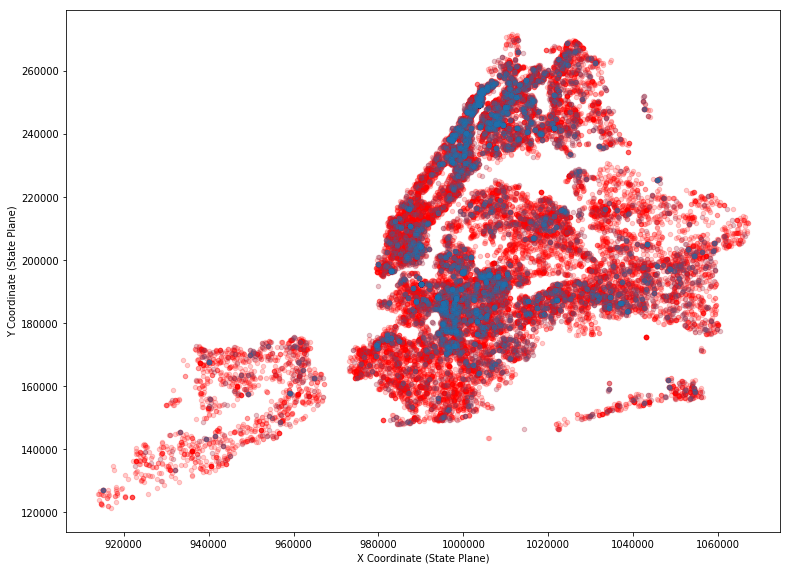

In [38]:
ax = df.plot.scatter(x='X Coordinate (State Plane)', y='Y Coordinate (State Plane)', alpha=0.2, figsize=(12.8,9.6), color='red')
dfNoise.plot.scatter(x='X Coordinate (State Plane)', y='Y Coordinate (State Plane)', alpha=0.1, figsize=(12.8,9.6), ax=ax)

In [39]:
dfCrime = pd.read_csv(puidata + "/NYPD_7_Major_Felony_Incidents.csv")
dfCrime.columns

Index(['OBJECTID', 'Identifier', 'Occurrence Date', 'Day of Week',
       'Occurrence Month', 'Occurrence Day', 'Occurrence Year',
       'Occurrence Hour', 'CompStat Month', 'CompStat Day', 'CompStat Year',
       'Offense', 'Offense Classification', 'Sector', 'Precinct', 'Borough',
       'Jurisdiction', 'XCoordinate', 'YCoordinate', 'Location 1'],
      dtype='object')

In [40]:
dfCrime['Location 1'][0]

'(40.6029515910001, -73.749976261)'

In [58]:
dfCrime['Longitude'] = dfCrime['Location 1'].map(lambda x: float(x.replace('(', '').replace(')', '').split(',')[1]))
dfCrime['Latitude'] = dfCrime['Location 1'].map(lambda x: float(x.replace('(', '').replace(')', '').split(',')[0]))
dfCrime.head()

,OBJECTID,Identifier,Occurrence Date,Day of Week,Occurrence Month,Occurrence Day,Occurrence Year,Occurrence Hour,CompStat Month,CompStat Day,...,Offense Classification,Sector,Precinct,Borough,Jurisdiction,XCoordinate,YCoordinate,Location 1,Longitude,Latitude
0,1107108,3d8920cf,03/01/2015 12:01:00 AM,Sunday,Mar,1,2015,0,6,17,...,FELONY,A,101,QUEENS,N.Y. POLICE DEPT,1053678,159044,"(40.6029515910001, -73.749976261)",-73.749976,40.602952
1,1107109,8c295251,03/01/2015 12:01:00 AM,Sunday,Mar,1,2015,0,3,1,...,FELONY,H,62,BROOKLYN,N.Y. POLICE DEPT,983057,163228,"(40.6147076880001, -74.0042984409999)",-74.004298,40.614708
2,1107110,303d301b,03/01/2015 12:01:00 AM,Sunday,Mar,1,2015,0,4,9,...,FELONY,C,66,BROOKLYN,N.Y. POLICE DEPT,986633,167258,"(40.6257689610001, -73.991416822)",-73.991417,40.625769
3,1107111,3edb706a,03/01/2015 12:01:00 AM,Sunday,Mar,1,2015,0,3,1,...,FELONY,A,121,STATEN ISLAND,N.Y. POLICE DEPT,936734,171157,"(40.63634376, -74.171202292)",-74.171202,40.636344
4,1107193,94d0b3da,03/01/2015 12:01:00 AM,Sunday,Mar,1,2015,0,3,19,...,FELONY,G,71,BROOKLYN,N.Y. POLICE DEPT,1002927,182323,"(40.6670997620001, -73.932676944)",-73.932677,40.667100


Text(0.5,1,'All Complaints')

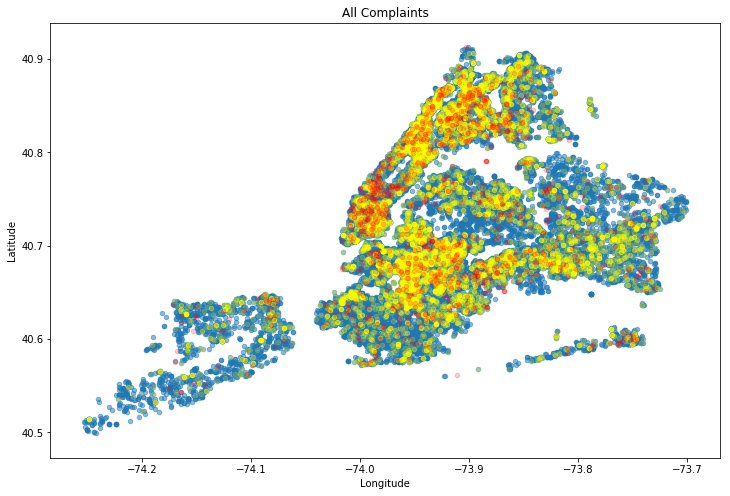

In [124]:
ax = df.plot.scatter(x='Longitude', y='Latitude', alpha=0.5)
dfNoise.plot.scatter(x='Longitude', y='Latitude', ax=ax, color='yellow',  alpha=0.2)
dfCrime.plot.scatter(x='Longitude', y='Latitude',ax=ax, color='red', alpha=0.2)
ax.set_title('All Complaints')

In [69]:
s = {'figure.figsize' : [12,8]}
rcParams.update(s)

In [82]:
import json
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib
    

In [83]:
def get_jsonparsed_data(url):
    response = urllib.urlopen(url)
    data = response.read().decode('utf-8')
    return json.loads(data)
data = get_jsonparsed_data('https://serv.cusp.nyu.edu/~fbianco/PUIdata/cityWeather.json')

In [84]:
type(data)

dict

In [92]:
data.keys()

dict_keys(['cod', 'list', 'cnt', 'message', 'city'])

In [87]:
data['cod']

'200'

In [113]:
type(data['cod']), type(data['city'])

(str, dict)

In [102]:
data['city'].keys()

dict_keys(['country', 'id', 'coord', 'population', 'name'])

In [109]:
data['city']['name'], data['city']['population'],data['city']['coord']

('New York', 0, {'lat': 40.714272, 'lon': -74.005966})

In [114]:
type(data['list']),len(data['list'])

(list, 7)

In [116]:
data['list'][0], type(data['list'][0])

({'clouds': 0,
  'deg': 173,
  'dt': 1473696000,
  'humidity': 80,
  'pressure': 1018.36,
  'speed': 1.16,
  'temp': {'day': 16.23,
   'eve': 16.23,
   'max': 16.23,
   'min': 16.23,
   'morn': 16.23,
   'night': 16.23},
  'weather': [{'description': 'clear sky',
    'icon': '01n',
    'id': 800,
    'main': 'Clear'}]},
 dict)

In [117]:
data['list'][0].keys()

dict_keys(['dt', 'speed', 'weather', 'deg', 'clouds', 'temp', 'humidity', 'pressure'])

In [122]:
data['list'][0]['dt'], type(data['list'][0]['dt'])

(1473696000, int)

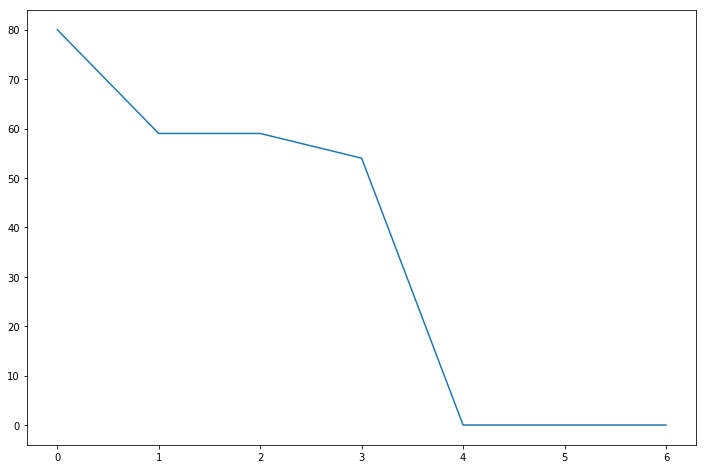

In [132]:
pl.plot([data['list'][i]['humidity'] for i in range(len(data['list']))])